# Simulación y Procesos Estocásticos: Tarea 2
## Ignacio Araya

In [555]:
import pandas as pd
import statsmodels.tsa.seasonal
import statsmodels as st
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.statespace.sarimax import SARIMAX
import scipy


# a) ARIMA

In [556]:
data = pd.read_csv('river_flows.csv')

## Data original

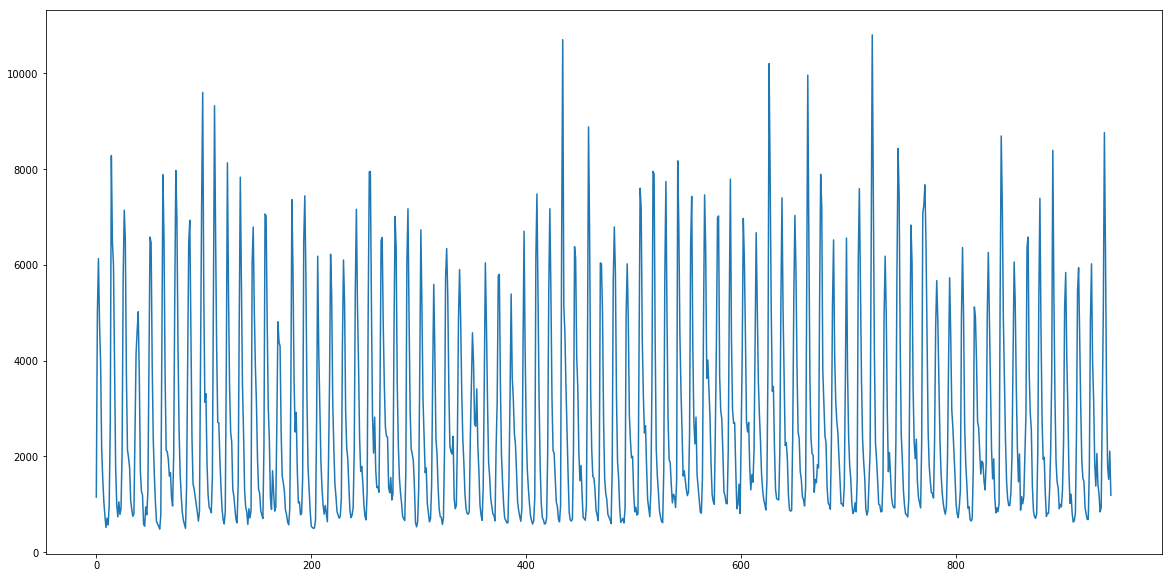

In [557]:
plt.figure(figsize= (20,10))
plt.plot(data.values[:,1])
plt.show()

## Log data

In [558]:
log_data = np.log(data.values[:,1].astype(float))

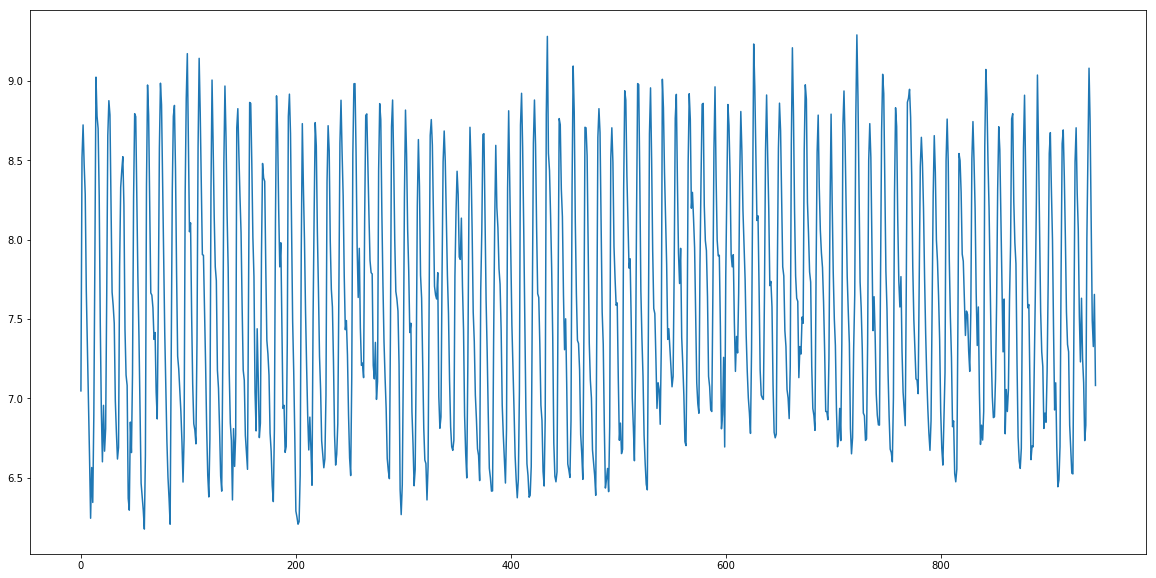

In [559]:
plt.figure(figsize= (20,10))
plt.plot(log_data)
plt.show()

## Comparación de ACFs

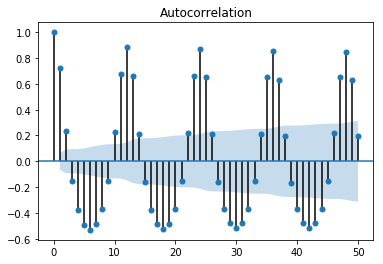

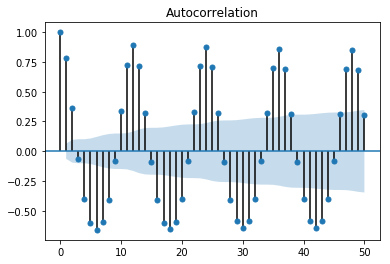

In [560]:
plot_acf(data.values[:,1].astype(float), lags = 50)
plot_acf(log_data, lags = 50)
plt.show()

## Desestacionalización

In [750]:
u = np.mean(log_data)
log_data = log_data - u 

decomposition = st.tsa.seasonal.seasonal_decompose(log_data, freq = 12, extrapolate_trend = 'freq')
d_t = decomposition.trend + decomposition.resid



## Tendencia mas residuo

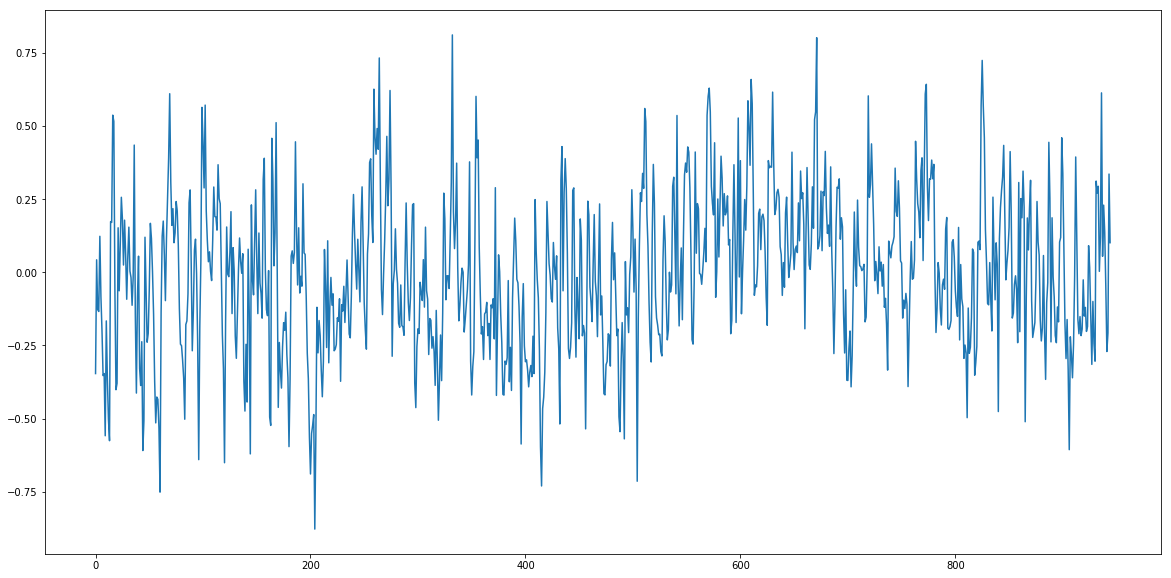

In [751]:
plt.figure(figsize= (20,10))
plt.plot(d_t)
plt.show()

## Componente estacional

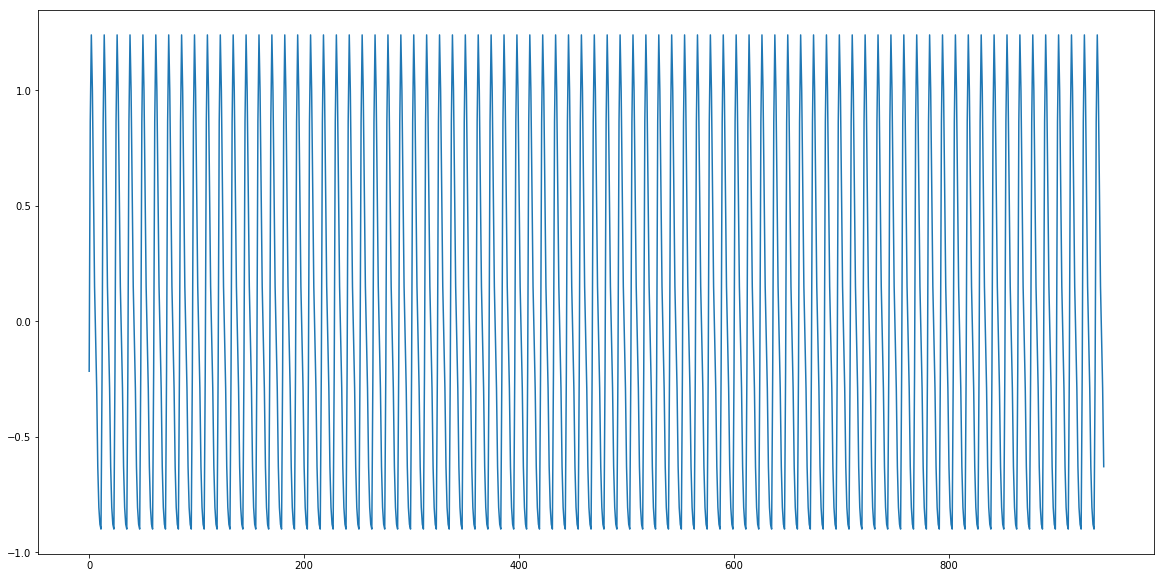

In [562]:
plt.figure(figsize= (20,10))
plt.plot(decomposition.seasonal)
plt.show()

## ACF y PACF data sin estacionalidad

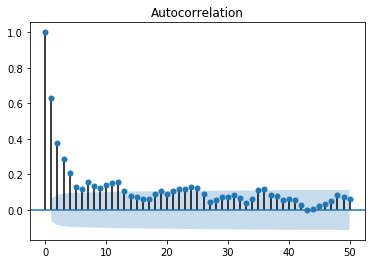

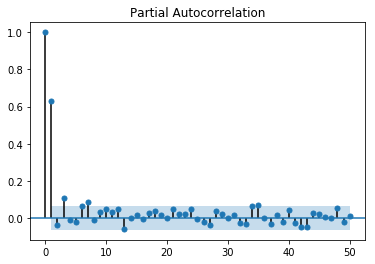

In [564]:
plot_acf(d_t, lags = 50)
plot_pacf(d_t, lags = 50)
plt.show()

## Estimación de la curva polinomial

In [586]:
f = lambda x,a,b,c,d,e,g,h: a + b*x + c*x**2 + d*x**3 
x = np.arange(N)

In [587]:
popt, pcov = scipy.optimize.curve_fit(f,x,d_t)

C:\Users\iaaraya\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


## Extracción de la curva

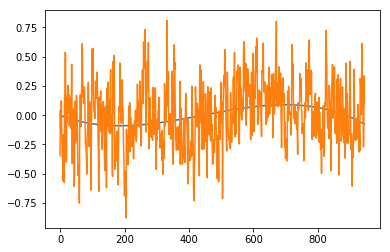

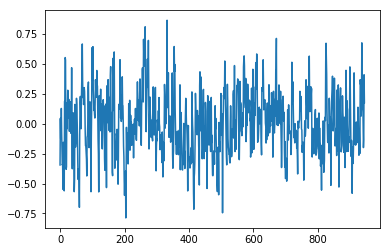

In [588]:
plt.plot(f(x,*popt))
plt.plot(d_t)
plt.show()
plt.plot(d_t - f(x,*popt))
plt.show()

In [15]:
d2 = d - f(x,*popt)

## ACF y PACF de la data final

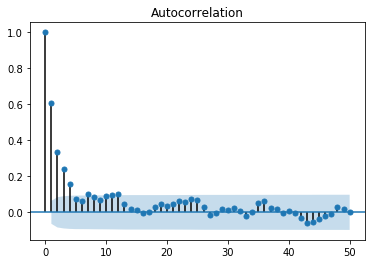

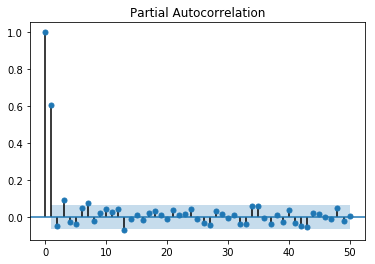

In [16]:
plot_acf(d2, lags = 50)
plt.show()
plot_pacf(d2, lags = 50)
plt.show()

## ARIMA(3,0,0)

In [589]:
data_arima = pd.Series(d2)
arima = SARIMAX(d2 ,order=(3,0,0))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  945
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 176.888
Date:                Thu, 23 Aug 2018   AIC                           -345.776
Time:                        02:25:02   BIC                           -326.372
Sample:                             0   HQIC                          -338.381
                                - 945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6445      0.030     21.694      0.000       0.586       0.703
ar.L2         -0.1115      0.037     -2.991      0.003      -0.185      -0.038
ar.L3          0.0934      0.032      2.882      0.004       0.030       0.157
sigma2         0.0402      0.002     24.751      0.000       0.037       0.043
===================================================================================
Ljung-Box (Q):                       40.53   Jarque-Bera (JB):                32.43
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.31
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

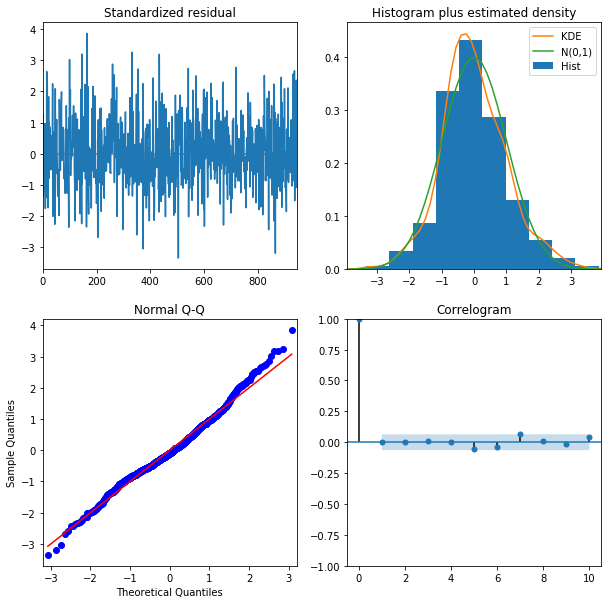

In [590]:
arima_fit.plot_diagnostics(figsize=(10,10))
plt.show()

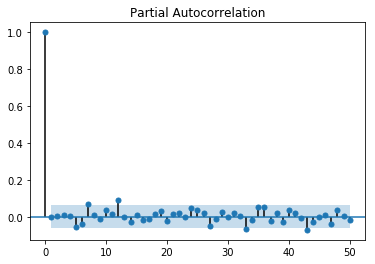

In [21]:
plot_pacf(arima_fit.resid, lags = 50)
plt.show()

In [591]:
statistic = acorr_ljungbox(arima_fit.resid, lags = 24)[0][-1]
pvalue = scipy.stats.chi2.sf(statistic, 24 - 3)

In [593]:
pvalue

0.30276373568107601

## ARIMA(7,0,0)

In [595]:
arima = SARIMAX(d2 ,order=(7,0,0))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  945
Model:               SARIMAX(7, 0, 0)   Log Likelihood                 181.693
Date:                Thu, 23 Aug 2018   AIC                           -347.386
Time:                        02:38:37   BIC                           -308.576
Sample:                             0   HQIC                          -332.595
                                - 945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6443      0.030     21.223      0.000       0.585       0.704
ar.L2         -0.1050      0.038     -2.791      0.005      -0.179      -0.031
ar.L3          0.1004      0.039      2.599      0.009       0.025       0.176
ar.L4         -0.0035      0.042     -0.083      0.934      -0.086       0.079
ar.L5         -0.0631      0.038     -1.644      0.100      -0.138       0.012
ar.L6          0.0036      0.036      0.100      0.920      -0.068       0.075
ar.L7          0.0739      0.031      2.348      0.019       0.012       0.136
sigma2         0.0398      0.002     24.693      0.000       0.037       0.043
===================================================================================
Ljung-Box (Q):                       34.93   Jarque-Bera (JB):                32.78
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.31
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

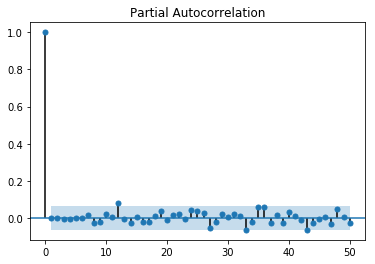

In [596]:
plot_pacf(arima_fit.resid, lags = 50)
plt.show()

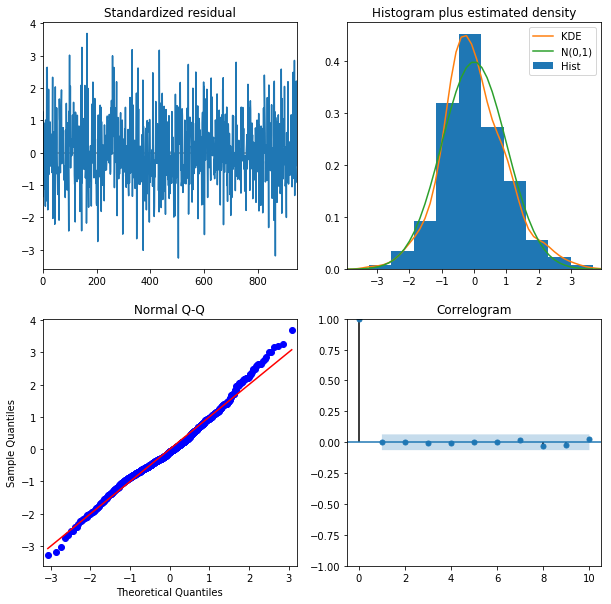

In [598]:
arima_fit.plot_diagnostics(figsize=(10,10))
plt.show()

In [608]:
statistic = acorr_ljungbox(arima_fit.resid, lags = 24)[0][-1]
pvalue = scipy.stats.chi2.sf(statistic, 24 - 7)

In [609]:
pvalue

0.62334014340374033

## ARIMA(12,0,0)

In [614]:
arima = SARIMAX(d2 ,order=(12,0,0))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  945
Model:              SARIMAX(12, 0, 0)   Log Likelihood                 184.150
Date:                Thu, 23 Aug 2018   AIC                           -342.301
Time:                        02:56:08   BIC                           -279.236
Sample:                             0   HQIC                          -318.266
                                - 945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6435      0.030     21.116      0.000       0.584       0.703
ar.L2         -0.1065      0.038     -2.820      0.005      -0.181      -0.032
ar.L3          0.0963      0.039      2.481      0.013       0.020       0.172
ar.L4         -0.0027      0.043     -0.064      0.949      -0.086       0.081
ar.L5         -0.0618      0.039     -1.597      0.110      -0.138       0.014
ar.L6          0.0003      0.037      0.009      0.992      -0.073       0.073
ar.L7          0.0882      0.038      2.322      0.020       0.014       0.163
ar.L8         -0.0336      0.043     -0.789      0.430      -0.117       0.050
ar.L9         -0.0054      0.046     -0.118      0.906      -0.096       0.085
ar.L10         0.0332      0.046      0.730      0.465      -0.056       0.122
ar.L11        -0.0060      0.041     -0.147      0.883      -0.086       0.074
ar.L12         0.0439      0.031      1.396      0.163      -0.018       0.106
sigma2         0.0396      0.002     24.145      0.000       0.036       0.043
===================================================================================
Ljung-Box (Q):                       26.80   Jarque-Bera (JB):                32.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.32
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

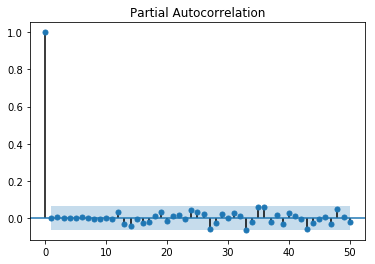

In [615]:
plot_pacf(arima_fit.resid, lags = 50)
plt.show()

In [617]:
statistic = acorr_ljungbox(arima_fit.resid, lags = 24)[0][-1]
pvalue = scipy.stats.chi2.sf(statistic, 24 - 7)
pvalue

0.94297904556225187

# b) sARIMA

In [618]:
data = np.log(pd.read_csv('river_flows.csv').values[:,1].astype(float))
u = np.mean(data)
data = data - np.mean(data)


## Data con diferenciación de lag 12

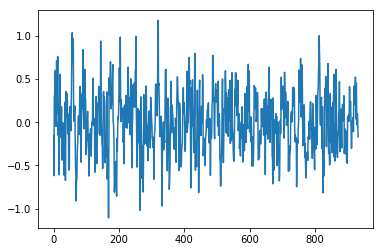

In [620]:
D_t = data[12:] - data[:-12]
plt.plot(D_t)
plt.show()

## ACF y PACF de la data transformada

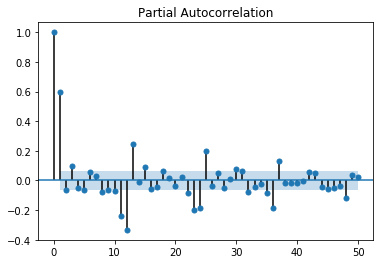

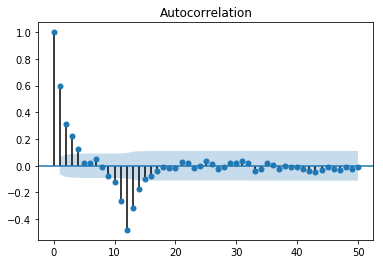

In [622]:
plot_pacf(D_t, lags = 50)
plot_acf(D_t, lags = 50)
plt.show()

## sARIMA(7,0,0)x(0,1,1,12)

In [623]:
model = SARIMAX(data, order = (7,0,0), seasonal_order = (0,1,1,12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  945
Model:             SARIMAX(7, 0, 0)x(0, 1, 1, 12)   Log Likelihood                 152.062
Date:                            Thu, 23 Aug 2018   AIC                           -286.125
Time:                                    03:26:22   BIC                           -242.579
Sample:                                         0   HQIC                          -269.519
                                            - 945                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6365      0.031     20.709      0.000       0.576       0.697
ar.L2         -0.0956      0.038     -2.542      0.011      -0.169      -0.022
ar.L3          0.1118      0.039      2.859      0.004       0.035       0.188
ar.L4          0.0010      0.041      0.025      0.980      -0.079       0.081
ar.L5         -0.0661      0.038     -1.720      0.085      -0.141       0.009
ar.L6          0.0171      0.036      0.474      0.635      -0.053       0.088
ar.L7          0.0765      0.031      2.437      0.015       0.015       0.138
ma.S.L12      -0.9254      0.016    -57.661      0.000      -0.957      -0.894
sigma2         0.0412      0.002     24.256      0.000       0.038       0.045
===================================================================================
Ljung-Box (Q):                       24.59   Jarque-Bera (JB):                25.99
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.29
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

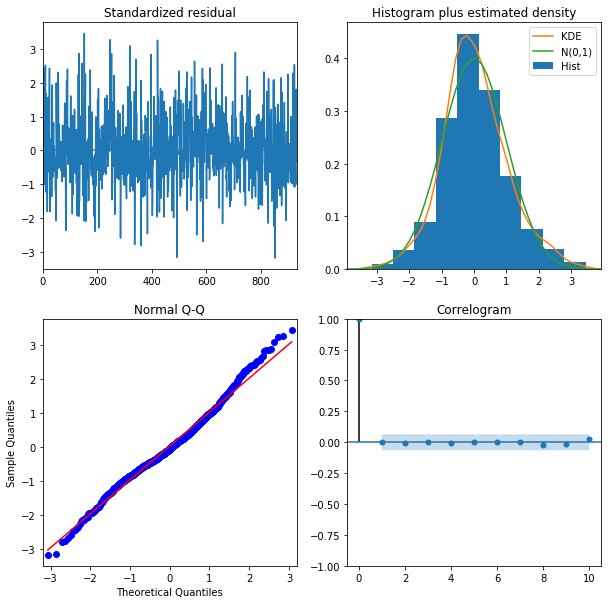

In [49]:
model_fit.plot_diagnostics(figsize=(10,10))

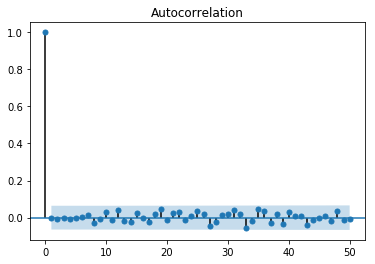

In [625]:
plot_acf(model_fit.resid[12:], lags = 50)
plt.show()

In [629]:
statistic = acorr_ljungbox(model_fit.resid[12:], lags = 24)[0][-1]
pvalue = scipy.stats.chi2.sf(statistic, 24 - 8)

In [630]:
pvalue

0.8489661503189907

# Forecasting

## ARIMA(12,0,0)

In [649]:
forecasted = arima_fit.get_forecast(steps = 6)
confidence = forecasted.conf_int()

x = np.arange(len(d2))
x2 = np.arange(len(d2),len(d2)+6)

recovered_data = data1.values[:,1]
recovered_forecast = np.exp(forecasted.predicted_mean + f(x2,*popt) + decomposition.seasonal[-12:-6] + u)

upper_confidence = np.exp(confidence[:,1] + f(x2,*popt) + decomposition.seasonal[-12:-6] + u)
lower_confidence = np.exp(confidence[:,0] + f(x2,*popt) + decomposition.seasonal[-12:-6] + u)


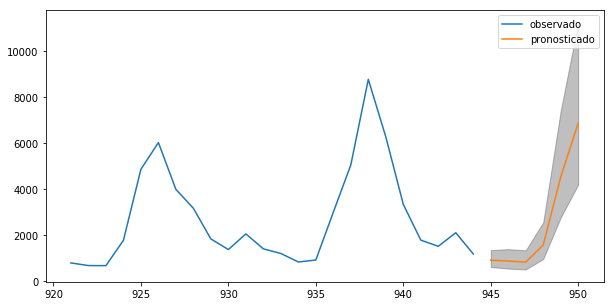

In [655]:
plt.figure(figsize=(10,5))
plt.plot(x[-24:],recovered_data[-24:], label = 'observado' )
plt.plot(x2,recovered_forecast, label = 'pronosticado')
plt.fill_between(x2,upper_confidence,lower_confidence, color='k', alpha=.25)
plt.legend()
plt.show()

## sARIMA(7,0,0)x(0,1,1,12)

In [651]:
forecasted = model_fit.get_forecast(steps = 6)
confidence = forecasted.conf_int()

x = np.arange(len(data))
x2 = np.arange(len(data),len(data)+6)

recovered_data = np.exp(data + u)
recovered_forecast2 = np.exp(forecasted.predicted_mean + u)

upper_confidence2 = np.exp(confidence[:,1]  + u)
lower_confidence2 = np.exp(confidence[:,0]  + u)


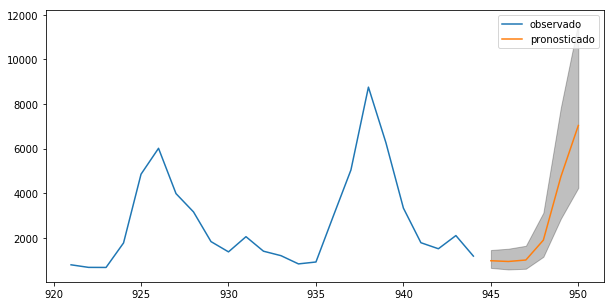

In [656]:
plt.figure(figsize=(10,5))
plt.plot(x[-24:],recovered_data[-24:], label = 'observado' )
plt.plot(x2,recovered_forecast2, label = 'pronosticado')
plt.fill_between(x2,upper_confidence2,lower_confidence2, color='k', alpha=.25)
plt.legend()
plt.show()

## Comparación ARIMA y sARIMA

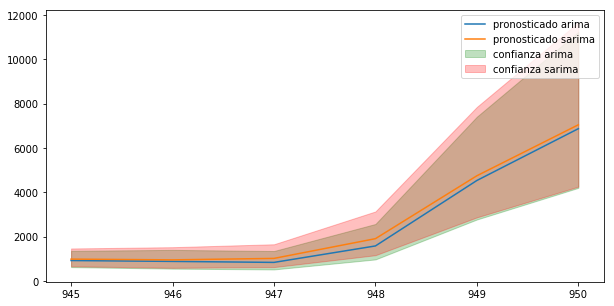

In [752]:
plt.figure(figsize=(10,5))
plt.plot(x2,recovered_forecast, label = 'pronosticado arima')
plt.plot(x2,recovered_forecast2, label = 'pronosticado sarima')

plt.fill_between(x2,upper_confidence,lower_confidence, color='g', alpha=.25, label='confianza arima')
plt.fill_between(x2,upper_confidence2,lower_confidence2, color='r', alpha=.25, label='confianza sarima')

plt.legend()
plt.show()

## Simulaciones

In [748]:
simulated = np.zeros((500,24))
n = 2000
for i in range(500):
    a=np.random.normal(0,np.sqrt(0.0412),size=(n))
    simulated[i,:] = np.exp(model_fit.simulate(nsimulations=n, initial_state = np.zeros((25))) + u)[-24:]

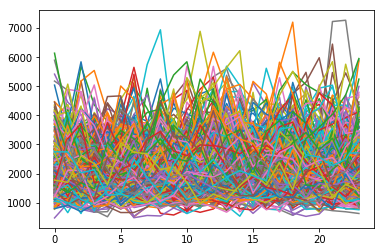

In [749]:
plt.plot(simulated.transpose())
plt.show()